In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [32]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [33]:
df= pd.read_csv("creditcard.csv")

In [34]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [35]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [37]:
final_data = df

In [38]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [39]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [40]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [41]:
x_data= data.drop(columns="Class", axis=0)
labels = data["Class"]

In [42]:
np.random.seed(12345)
msk = np.random.rand(len(labels)) < 0.72
train_label = labels[msk]
test_label = labels[~msk]
test_label

0      1
6      1
8      1
10     1
11     1
      ..
967    0
972    0
976    0
982    0
983    0
Name: Class, Length: 281, dtype: int64

In [43]:
np.random.seed(12345)
msk = np.random.rand(len(x_data)) < 0.72
train_total = x_data[msk]
test_total = x_data[~msk]

In [44]:
print(len(train_total))
print(len(test_total))

703
281


In [45]:
print(len(train_label))
print(len(test_label))

703
281


In [46]:
train_total.shape, test_total.shape

((703, 30), (281, 30))

In [47]:
mean=train_total.mean(axis=0)
train_data= train_total-mean
std=train_total.std(axis=0)
train_data = (train_total-mean)/std
test_data = (test_total-mean)/std

In [48]:
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,-1.839776,-0.104489,-1.330128,0.768611,-0.006893,0.691958,-0.188228,0.522101,-0.040676,0.435846,...,1.501971,0.083138,0.320917,1.055962,-0.391803,0.414616,-0.298684,-0.331724,0.008171,1.699577
2,-1.755556,0.030986,-0.024075,0.532898,0.006071,0.170357,0.374284,0.561426,-0.104315,0.449605,...,-0.474291,-0.222319,-0.748783,0.146550,-0.030052,-0.226167,-1.144705,-0.043054,-0.376938,0.533277
3,-1.702280,-0.352387,-0.130566,0.169435,0.115008,0.097069,-0.553202,-0.112715,-0.075436,0.445602,...,-0.272624,0.054978,0.118757,-0.313683,0.029216,0.374349,-1.389312,-0.898877,1.668217,-0.196714
4,-1.691029,0.678459,0.310767,-0.109173,0.754837,1.233396,-0.354828,0.752634,-0.122986,0.010084,...,-0.131630,-0.249451,-0.570318,-0.480412,-2.737529,2.191974,1.217935,-0.092014,0.234652,-0.430724
5,-1.690881,0.454103,0.607783,-0.424296,1.360361,0.550525,-1.489660,0.196982,0.002039,-0.626531,...,0.242431,-0.011830,-0.495148,-0.391773,0.348862,2.191356,1.092641,0.644462,0.982829,-0.430724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,-0.439043,0.607494,-0.761738,0.855850,-0.025387,0.022956,1.155325,0.261016,0.072891,1.208750,...,-0.052065,-0.113531,0.125136,-0.204900,-0.524885,0.403836,2.614763,-0.099233,0.017555,0.204089
978,-0.545595,0.373777,-0.238223,0.825382,-0.789214,0.391516,0.191889,0.560456,-0.002271,0.317614,...,-0.074368,-0.193801,-0.478401,-0.038289,0.060060,-0.287872,0.173193,0.172627,0.151874,-0.427537
979,-0.650374,0.631724,-1.015420,0.716400,-1.063326,-0.176502,0.078105,0.287669,-0.052492,-0.070037,...,0.020265,-0.124303,-0.150154,-0.089512,0.786247,0.103769,-0.516364,-0.068463,0.096367,0.665291
980,0.942481,0.824333,-0.522502,0.358408,-0.663741,0.362398,-0.388485,0.537617,-0.110984,0.827513,...,-0.285875,-0.168522,-0.204711,0.142423,0.229402,0.033982,-0.167626,-0.136245,-0.183440,-0.317754


In [49]:
test_label

0      1
6      1
8      1
10     1
11     1
      ..
967    0
972    0
976    0
982    0
983    0
Name: Class, Length: 281, dtype: int64

In [50]:
test_data = np.array(test_data.iloc[:])
train_data = np.array(train_data.iloc[:])

In [51]:
train_labels=np.asarray(train_label).astype(dtype="float64")
test_labels=np.asarray(test_label).astype(dtype="float64")

In [52]:
model= models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape=(train_data.shape[1],)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
history=model.fit(train_data, train_labels, epochs=20, validation_split=.2)

Epoch 1/20
18/18 [==============================] - 0s 12ms/step - loss: 0.6657 - accuracy: 0.5534 - val_loss: 0.7345 - val_accuracy: 0.1277
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6833 - val_loss: 0.7272 - val_accuracy: 0.2553
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7562 - val_loss: 0.6976 - val_accuracy: 0.5674
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8488 - val_loss: 0.6401 - val_accuracy: 0.8227
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8826 - val_loss: 0.5516 - val_accuracy: 0.9362
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8915 - val_loss: 0.4511 - val_accuracy: 0.9787
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8986 - val_loss: 0.3508 - val_accuracy: 0.9929
Epoch 8/20
18/18 [=

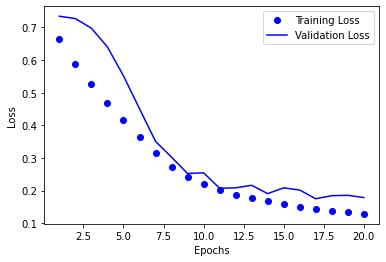

In [54]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

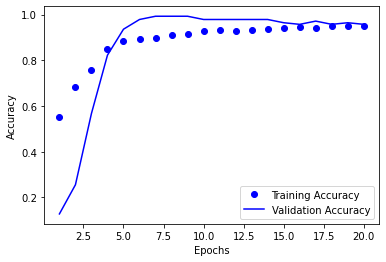

In [55]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [56]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9110


In [57]:
test_acc_score *100

91.10320210456848

In [58]:
prediction=model.predict(test_data).astype(dtype="u8")

In [59]:
prediction[:30]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=uint64)

In [60]:
test_labels[:30]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [61]:
predictions = model.predict(test_data)

In [62]:
y_pred = (predictions > 0.5)

In [63]:
con = tf.math.confusion_matrix(
    test_labels, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

In [64]:
con

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[138,   8],
       [ 17, 118]])>